In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat-ii/train.csv
/kaggle/input/cat-in-the-dat-ii/test.csv
/kaggle/input/cat-in-the-dat-ii/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/cat-in-the-dat-ii/train.csv')
test = pd.read_csv('/kaggle/input/cat-in-the-dat-ii/test.csv')

In [3]:
train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null int64
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(2), object(17)
memory usage: 114.4

In [6]:
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary


summary(train)



,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,id,int64,0,600000,0,1,2
1,bin_0,float64,17894,2,0,1,0
2,bin_1,float64,18003,2,0,1,1
3,bin_2,float64,17930,2,0,0,0
4,bin_3,object,18014,2,F,F,F
5,bin_4,object,18047,2,N,Y,N
6,nom_0,object,18252,3,Red,Red,Red
7,nom_1,object,18156,6,Trapezoid,Star,NaN
8,nom_2,object,18035,6,Hamster,Axolotl,Hamster
9,nom_3,object,18121,6,Russia,NaN,Canada


In [7]:
set(train['bin_0'].isna())

{False, True}

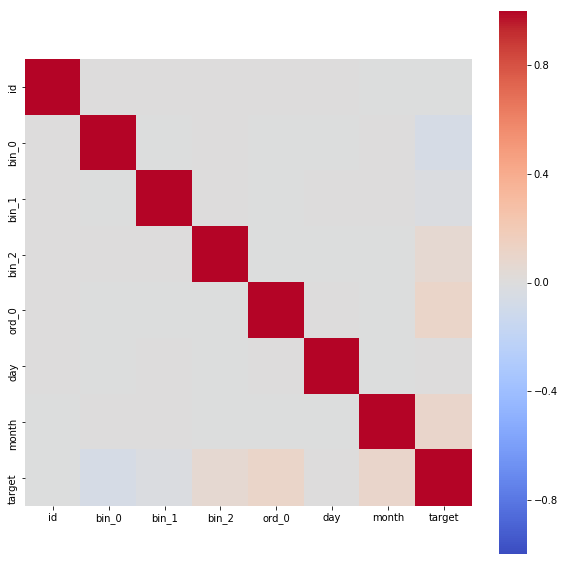

In [8]:
corr = train.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap='coolwarm',square=True)

**Finding Missing Values**

In [9]:
def missing_value(df):
    final = []
    empty = {}
    list_of_columns = list(df.columns)
    for column in range(0,len(list_of_columns)):
        data = set(df[list_of_columns[column]].isna())
        empty.update({
            list_of_columns[column]:data
        })
    final.append(empty)
    return final

In [10]:
missing_value(train)

[{'id': {False},
  'bin_0': {False, True},
  'bin_1': {False, True},
  'bin_2': {False, True},
  'bin_3': {False, True},
  'bin_4': {False, True},
  'nom_0': {False, True},
  'nom_1': {False, True},
  'nom_2': {False, True},
  'nom_3': {False, True},
  'nom_4': {False, True},
  'nom_5': {False, True},
  'nom_6': {False, True},
  'nom_7': {False, True},
  'nom_8': {False, True},
  'nom_9': {False, True},
  'ord_0': {False, True},
  'ord_1': {False, True},
  'ord_2': {False, True},
  'ord_3': {False, True},
  'ord_4': {False, True},
  'ord_5': {False, True},
  'day': {False, True},
  'month': {False, True},
  'target': {False}}]

In [11]:
train.isna().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

**Treating Null and Missing Values**

In [12]:
 train['bin_0'].fillna(np.ceil(train['bin_0'].mean()), inplace = True)
test['bin_0'].fillna(np.ceil(test['bin_0'].mean()), inplace = True)

train['bin_1'].fillna(np.ceil(train['bin_1'].mean()), inplace = True)
test['bin_1'].fillna(np.ceil(test['bin_1'].mean()), inplace = True)

train['bin_2'].fillna(np.ceil(train['bin_2'].mean()),inplace = True)
test['bin_2'].fillna(np.ceil(test['bin_2'].mean()),inplace = True)

train['bin_3'].fillna((train['bin_3'].mode()[0]), inplace = True)
test['bin_3'].fillna((test['bin_3'].mode()[0]), inplace = True)

train['bin_4'].fillna((train['bin_4'].mode()[0]), inplace = True)
test['bin_4'].fillna((test['bin_4'].mode()[0]), inplace = True)

train['nom_0'].fillna(train['nom_0'].mode()[0],inplace = True)
test['nom_0'].fillna(test['nom_0'].mode()[0],inplace = True)

train['nom_1'].fillna(train['nom_1'].mode()[0],inplace = True)
test['nom_1'].fillna(test['nom_1'].mode()[0],inplace = True)

train['nom_2'].fillna(train['nom_2'].mode()[0],inplace = True)
test['nom_2'].fillna(test['nom_2'].mode()[0],inplace = True)

train['nom_3'].fillna(train['nom_3'].mode()[0],inplace = True)
test['nom_3'].fillna(test['nom_3'].mode()[0],inplace = True)

train['nom_4'].fillna(train['nom_4'].mode()[0],inplace = True)
test['nom_4'].fillna(test['nom_4'].mode()[0],inplace = True)

train['nom_5'].fillna(train['nom_5'].mode()[0],inplace = True)
test['nom_5'].fillna(test['nom_5'].mode()[0],inplace = True)

train['nom_6'].fillna(train['nom_6'].mode()[0],inplace = True)
test['nom_6'].fillna(test['nom_6'].mode()[0],inplace = True)

train['nom_7'].fillna(train['nom_7'].mode()[0],inplace = True)
test['nom_7'].fillna(test['nom_7'].mode()[0],inplace = True)

train['nom_8'].fillna(train['nom_8'].mode()[0],inplace = True)
test['nom_8'].fillna(test['nom_8'].mode()[0],inplace = True)

train['nom_9'].fillna(train['nom_9'].mode()[0],inplace = True)
test['nom_9'].fillna(test['nom_9'].mode()[0],inplace = True)

train['ord_0'].fillna(train['ord_0'].mode()[0],inplace = True)
test['ord_0'].fillna(test['ord_0'].mode()[0],inplace = True)

train['ord_1'].fillna(train['ord_1'].mode()[0],inplace = True)
test['ord_1'].fillna(test['ord_1'].mode()[0],inplace = True)

train['ord_2'].fillna(train['ord_2'].mode()[0],inplace = True)
test['ord_2'].fillna(test['ord_2'].mode()[0],inplace = True)

train['ord_3'].fillna(train['ord_3'].mode()[0],inplace = True)
test['ord_3'].fillna(test['ord_3'].mode()[0],inplace = True)

train['ord_4'].fillna(train['ord_4'].mode()[0],inplace = True)
test['ord_4'].fillna(test['ord_4'].mode()[0],inplace = True)

train['ord_5'].fillna(train['ord_5'].mode()[0],inplace = True)
test['ord_5'].fillna(test['ord_5'].mode()[0],inplace = True)

train['day'].fillna(train['day'].mode()[0],inplace = True)
test['day'].fillna(test['day'].mode()[0],inplace = True)

train['month'].fillna(train['month'].mode()[0],inplace = True)
test['month'].fillna(test['month'].mode()[0],inplace = True)

**Encoding the data**

In [13]:
train['bin_3'] = train['bin_3'].apply(lambda x: 0 if x == 'F' else 1)
test['bin_3'] = test['bin_3'].apply(lambda x: 0 if x == 'F' else 1)

# bin_4
train['bin_4'] = train['bin_4'].apply(lambda x: 0 if x == 'N' else 1)
test['bin_4'] = test['bin_4'].apply(lambda x: 0 if x == 'N' else 1)

# ord_1
train.ord_1.replace(to_replace = ['Novice', 'Contributor','Expert', 'Master', 'Grandmaster'],
                         value = [0, 1, 2, 3, 4], inplace = True)
test.ord_1.replace(to_replace = ['Novice', 'Contributor','Expert', 'Master', 'Grandmaster'],
                         value = [0, 1, 2, 3, 4], inplace = True)

# ord_2
train.ord_2.replace(to_replace = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'],
                         value = [0, 1, 2, 3, 4, 5], inplace = True)
test.ord_2.replace(to_replace = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'],
                         value = [0, 1, 2, 3, 4, 5], inplace = True)

# ord_3
train.ord_3.replace(to_replace = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)
test.ord_3.replace(to_replace = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)

# ord_4
train.ord_4.replace(to_replace = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 
                                     'P', 'Q', 'R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                  22, 23, 24, 25], inplace = True)
test.ord_4.replace(to_replace = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 
                                     'P', 'Q', 'R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                  22, 23, 24, 25], inplace = True)

high_card = ['nom_0','nom_1','nom_2','nom_3','nom_4','nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9','ord_5']
for col in high_card:
    enc_nom = (train.groupby(col).size()) / len(train)
    train[f'{col}'] = train[col].apply(lambda x: hash(str(x)) % 5000)
    test[f'{col}'] = test[col].apply(lambda x: hash(str(x)) % 5000)

In [14]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,0,0,2807,3923,434,4204,3687,410,152,1138,1965,236,3.0,1,3,2,20,51,6.0,3.0,0
1,1,1.0,1.0,0.0,0,1,2807,967,1061,3560,3829,1034,1393,2591,2345,3511,3.0,4,2,4,23,2745,7.0,7.0,0
2,2,0.0,1.0,0.0,0,0,2807,7,434,1639,3687,3092,1617,4614,357,2587,3.0,0,0,13,15,1888,5.0,9.0,0
3,3,1.0,0.0,0.0,0,0,2807,1691,434,7,3829,1807,2828,3100,231,2314,1.0,0,5,0,2,3090,3.0,3.0,0
4,4,0.0,1.0,0.0,1,0,2807,7,434,4959,3829,4395,2578,4188,3378,3593,3.0,4,1,7,2,2526,5.0,12.0,0


In [15]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,0,1,4447,4347,1061,7,913,4,715,2091,4822,4174,3.0,0,4,5,20,61,3.0,9.0
1,600001,0.0,0.0,0.0,0,1,2807,1691,341,4204,3687,4492,4305,4510,2252,3466,1.0,0,1,13,13,3090,2.0,8.0
2,600002,0.0,0.0,0.0,0,1,4447,1691,1061,4204,3829,3451,2102,4642,490,1916,1.0,2,2,8,13,3413,2.0,6.0
3,600003,1.0,0.0,0.0,0,0,2807,4347,1061,4959,3687,1273,1896,2524,603,3565,1.0,2,3,12,1,3095,1.0,6.0
4,600004,0.0,0.0,1.0,0,1,2807,1691,434,7,3829,4735,4288,2621,337,2682,1.0,1,5,14,9,2149,3.0,3.0


In [16]:
y = train['target']
x = train.drop(['target','id'],axis = 1)


In [17]:
len(x)

600000

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
clf = LogisticRegression(C=0.20, solver="lbfgs", tol=0.020, max_iter=2020)
clf.fit(X_train,y_train)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2020,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.02, verbose=0,
                   warm_start=False)

In [21]:
pred = clf.predict_proba(X_test)
pred

array([[0.83344717, 0.16655283],
       [0.76803314, 0.23196686],
       [0.91086289, 0.08913711],
       ...,
       [0.84120368, 0.15879632],
       [0.70648301, 0.29351699],
       [0.87465486, 0.12534514]])

In [22]:
y_pred=clf.predict(X_test)

In [23]:
value = accuracy_score(y_test,y_pred)
print(value)

0.8095404040404041


Text(43.5, 0.5, 'Original Class')

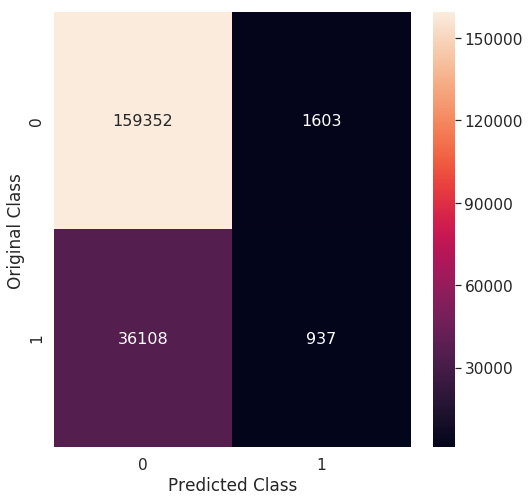

In [24]:
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [25]:
pres = precision_score(y_test, y_pred)
print(pres)

0.36889763779527557


In [26]:
f1 = f1_score(y_test, y_pred,average='micro')
print(f1*100)

80.95404040404041


In [27]:
submission = pd.read_csv('/kaggle/input/cat-in-the-dat-ii/sample_submission.csv')

In [34]:
test_id = test.pop('id')

KeyError: 'id'

In [35]:

submission['id'] = test_id
submission['target'] = clf.predict_proba(test)

In [36]:
submission.head()

,id,target
0,600000,0.533536
1,600001,0.838190
2,600002,0.878516
3,600003,0.726515
4,600004,0.700054


In [ ]:
submission.to_csv("submission.csv", index=False)